In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
# k-means algorithm from scikit-learn
from sklearn.cluster import KMeans
# convenience module that bulk imports matplotlib
import pylab as pl

In [2]:
# import times data
path = r'/Users/samira/Desktop/6 Advanced Analytics and Dashboard Design/'
df = pd.read_csv(os.path.join(path, 'Data', 'Original Data', 'timesData.csv'))

In [3]:
df

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,601-800,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,-,"21,958",15.3,3%,48 : 52,2016
2599,601-800,Yıldız Technical University,Turkey,14.5,14.9,7.6,19.3,44.0,-,"31,268",28.7,2%,36 : 64,2016
2600,601-800,Yokohama City University,Japan,24.0,16.1,10.2,36.4,37.9,-,"4,122",3.7,3%,NaN,2016
2601,601-800,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,-,"10,117",12.1,8%,28 : 72,2016


In [4]:
print(df.dtypes)

world_rank                 object
university_name            object
country                    object
teaching                  float64
international              object
research                  float64
citations                 float64
income                     object
total_score                object
num_students               object
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object


In [5]:
df.loc[df['international'].str.contains("-", case=False)]

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
16,17,University of Toronto,Canada,75.8,-,87.9,82.2,-,82.0,"66,198",19.5,15%,NaN,2011
43,43,Karolinska Institute,Sweden,65.8,-,72.7,62.3,73.3,67.0,"7,774",11.5,22%,70 : 30,2011
49,49,University of Science and Technology of China,China,57.5,-,48.6,92.7,30.3,66.0,"14,290",7.9,2%,NaN,2011
92,93,McMaster University,Canada,44.7,-,58.7,68.5,-,57.6,"23,823",19.3,15%,53 : 47,2011
128,129,Stockholm University,Sweden,36.9,-,49.2,75.9,31.7,54.0,"31,715",23.7,8%,62 : 38,2011
130,130,University of Victoria,Canada,32.9,-,48.3,79.1,27.4,53.4,"17,581",21.5,11%,56 : 44,2011
137,138,University of Montreal,Canada,56.1,-,49.4,51.9,-,52.4,"38,264",20.3,25%,57 : 43,2011
172,173,Bielefeld University,Germany,39.9,-,35.7,70.4,-,49.3,"21,428",67.8,8%,57 : 43,2011
199,199,Swedish University of Agricultural Sciences,Sweden,43.3,-,49.5,41.7,99.9,46.2,"3,879",4.6,NaN,67 : 33,2011


In [6]:
# save dataframe in df - only the rows where 'world_rank' DOESN't contain "-"
df = df[df['international'].str.contains("-", case=False) == False]

In [7]:
df['international'] = df['international'].astype(float)

/var/folders/hd/hlnnpt8n2s3gcdgpc7rf9ly00000gp/T/ipykernel_43661/2268362952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['international'] = df['international'].astype(float)


In [8]:
# save dataframe in df - only the rows where 'world_rank' DOESN't contain "-"
df = df[df['income'].str.contains("-", case=False) == False]
df['income'] = df['income'].astype(float)

/var/folders/hd/hlnnpt8n2s3gcdgpc7rf9ly00000gp/T/ipykernel_43661/878959441.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income'] = df['income'].astype(float)


In [9]:
df.loc[df['total_score'].str.contains("-", case=False)]

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
400,201-225,Autonomous University of Barcelona,Spain,33.7,45.9,27.9,57.9,37.0,-,"30,538",12.3,10%,59 : 41,2012
401,201-225,Bilkent University,Turkey,27.9,48.5,22.3,60.8,29.4,-,NaN,NaN,NaN,NaN,2012
402,201-225,Cardiff University,United Kingdom,28.9,67.8,34.0,51.7,35.5,-,"23,347",13.1,23%,57 : 43,2012
403,201-225,Colorado School of Mines,United States of America,24.6,38.4,22.8,63.7,99.4,-,"5,287",18.2,12%,26 : 74,2012
404,201-225,Nagoya University,Japan,45.5,21.2,39.2,43.8,33.1,-,"15,529",7.9,10%,29 : 71,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,601-800,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,-,"21,958",15.3,3%,48 : 52,2016
2599,601-800,Yıldız Technical University,Turkey,14.5,14.9,7.6,19.3,44.0,-,"31,268",28.7,2%,36 : 64,2016
2600,601-800,Yokohama City University,Japan,24.0,16.1,10.2,36.4,37.9,-,"4,122",3.7,3%,NaN,2016
2601,601-800,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,-,"10,117",12.1,8%,28 : 72,2016


In [10]:
# only get numerical columns (and ones without NaNs)
df = pd.DataFrame(df, columns = ['world_rank', 'teaching', 'international', 'research', 'citations', 'income'])

In [11]:
# cleaning df_times
df = df[df['world_rank'].str.contains("-", case=False) == False]
df = df[df['world_rank'].str.contains("=", case=False) == False]
df['world_rank'] = df['world_rank'].astype(int)

In [12]:
print(df.dtypes)

world_rank         int64
teaching         float64
international    float64
research         float64
citations        float64
income           float64
dtype: object


In [13]:
# applying elbow technique to get optimal number of clusters
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [14]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 

In [15]:
score

[-5111079.049969104,
 -2238691.2488304507,
 -1662822.2259846344,
 -1454850.282433541,
 -1275419.5619596313,
 -1153381.9219383202,
 -1060398.738857987,
 -972972.0917773116,
 -906220.7045019674]

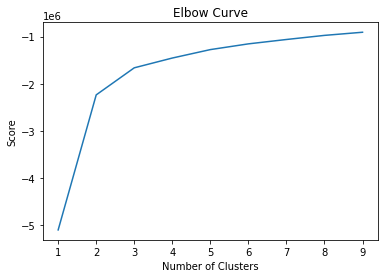

In [16]:
# plot elbow curve
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

From 2 to 3 there's a large jump and afterwards the curve flattens. Therefore the **optimal amount of clusters is 3** (= n_clusters).

In [17]:
# create k-means object
# Note: n_jobs is no longer an argument (since version 0.23)
# all cores are used by default
kmeans = KMeans(n_clusters = 3) 

In [18]:
# fit the k-means object to the data.
kmeans.fit(df)

KMeans(n_clusters=3)

In [19]:
df['clusters'] = kmeans.fit_predict(df)

In [20]:
df

,world_rank,teaching,international,research,citations,income,clusters
0,1,99.7,72.4,98.7,98.8,34.5,1
1,2,97.7,54.6,98.0,99.9,83.7,1
2,3,97.8,82.3,91.4,99.9,87.5,1
3,4,98.3,29.5,98.1,99.2,64.3,1
5,6,90.5,77.7,94.1,94.0,57.0,1
...,...,...,...,...,...,...,...
1994,192,35.2,58.2,23.9,86.4,58.4,2
1997,195,37.3,61.1,22.2,83.8,68.4,2
2000,198,30.8,55.9,27.4,87.7,47.1,2
2001,199,30.5,64.9,22.9,91.0,29.0,2


In [21]:
df['clusters'].value_counts()

2    352
0    332
1    287
Name: clusters, dtype: int64

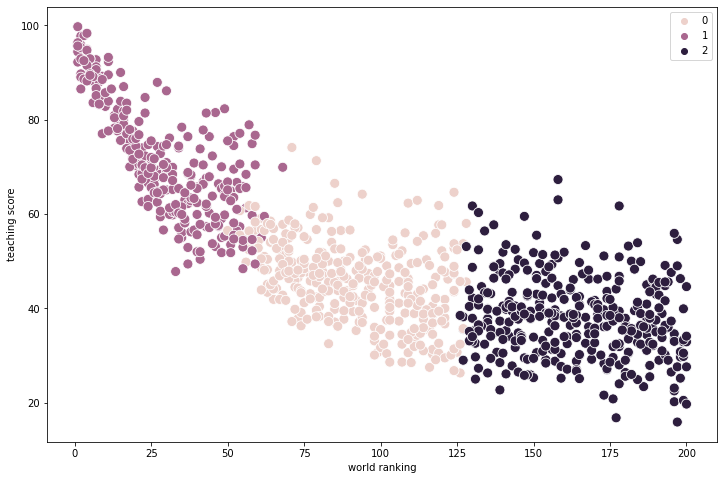

In [22]:
# visualize clusters, teaching
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['world_rank'], y=df['teaching'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('world ranking')
plt.ylabel('teaching score')
plt.show()

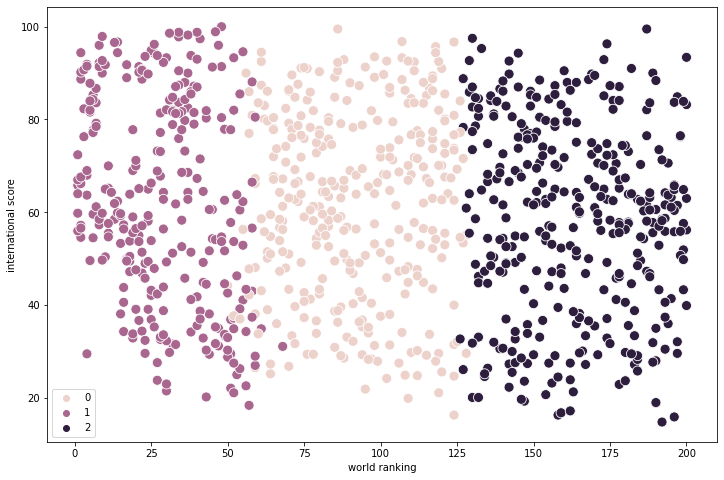

In [23]:
# visualize clusters, international
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['world_rank'], y=df['international'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('world ranking')
plt.ylabel('international score')
plt.show()

If we compare these two charts, we can clearly see that higher ranked universities have a higher teaching score, while not all higher ranked universities have a significantly higher international score than other universities.

In [24]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [25]:
df.groupby('cluster').agg({'world_rank':['mean', 'median'], 
                           'teaching':['mean', 'median'],
                           'international':['mean', 'median'],
                           'research':['mean', 'median'],
                           'citations':['mean', 'median'],
                           'income':['mean', 'median']})

world_rank          teaching        international         \
                   mean median       mean median          mean median   
cluster                                                                 
dark purple  163.696023  163.0  37.945455  37.90     58.075000  60.20   
pink          91.475904   90.0  45.827711  45.95     61.705723  63.65   
purple        28.926829   29.0  71.978746  70.20     62.269338  60.60   

              research         citations            income         
                  mean median       mean median       mean median  
cluster                                                            
dark purple  37.380966   36.3  67.847727  68.25  48.219886   41.0  
pink         47.509639   47.9  77.112651  78.70  53.391566   43.1  
purple       77.269338   77.1  86.521603  90.80  61.562718   56.0

The results can be useful to compare the relationships between two variables at a time. In this case, we found that the international rating does not have a large impact on the university's world ranking.